
# YZV-211E Introduction to Data Science and Engineering


## Homework 4: Building and Evaluating Machine Learning Models



---



In this assignment, you will be practicing:
* Regression
* Classification
* Clustering
* Evaluating ML models

**Before diving into solving assignment**:
* Use random_state parameter as 0 if the parameter exists to avoid different solutions if the code is re-executed.
* You can add cells within the headers for your code.
* Prefarably, use models within the sklearn. 
* Write your name, surname and student number in the below markdown.
* This is the last homework before the project, thanks for your efforts so far. Keep up the good work, the semester is almost done :)


In [34]:
import numpy as np
np.random.seed(42) # meaning of life: 42

### Submitted by:
- # Furkan Ataç

### Import necessary packages

Import packages that you are going to use, do not remove already existing ones.

In [35]:
###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

## Regression

*Recall: In regression task, aim is to make predictions on continous values (e.g. predicting expected income in next month for a company)*

A NASA dataset about average temperature is given. In the dataset, annual difference in average global temperature is given. Your task is to use the data between **1880 and 2010 (inclusive) to train your model** and **make predictions for upcoming years after 2010 (2011-2021)**. **Evaluate your model with actual annual difference for these years**.

In [36]:
df = pd.read_csv("nasa-temperature.txt",sep=",",index_col=0)
df.head()

,Year,Difference
0,1880,-0.16
1,1881,-0.07
2,1882,-0.10
3,1883,-0.17
4,1884,-0.28


### Training-Test Split

Since this is a temporal (time-based) dataset, training-test split should be done carefully. Aim is to use historical data to predict annual difference in upcoming years.
* Use the data between **1880 and 2010 (inclusive) as training set**
* **test set consist of samples after 2010 (2011-2021)**.

In [37]:
# data between 1880 and 2010 as training
# 2011-2021 is test
train = df[df["Year"] < 2011]
test = df[df["Year"] >= 2011]

### Apply simple linear regression

* Apply simple linear regression
* Plot the actual values and predictions (plot both train and test predictions together for complete view).
* Using appropriate metrics (at least 2), report how well your regression line fit to both training data and testing data.

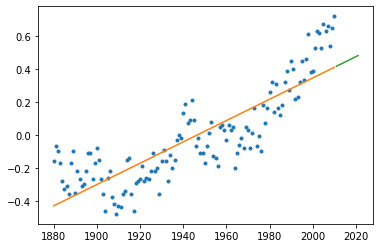

MSE train:  0.02384643587692537
MSE test:  0.16525922756777783
R2 train:  0.7151034264390299
R2 test:  -7.313114881392334


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train
X_train = np.array(train["Year"]).reshape(-1,1) # reshape(-1,1) means that we want to have one column and as many rows as needed
y_train = np.array(train["Difference"]).reshape(-1,1)
model = LinearRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_train)

# test
X_test = np.array(test["Year"]).reshape(-1,1)
y_test = np.array(test["Difference"]).reshape(-1,1)
y_pred_test = model.predict(X_test)

# plot
plt.plot(X_train,y_train,".")
plt.plot(X_train,y_pred,"-")
plt.plot(X_test,y_pred_test,"-")
plt.show()

# now lets report our regression line using at least two metrics
# mean squared error
print("MSE train: ",mean_squared_error(y_train,y_pred))
print("MSE test: ",mean_squared_error(y_test,y_pred_test))

# r2 score
from sklearn.metrics import r2_score
print("R2 train: ",r2_score(y_train,y_pred))
print("R2 test: ",r2_score(y_test,y_pred_test))

# Based on the mean squared error (MSE) and R2 values for the training and test data, 
# it seems that this linear regression model is not performing well. 
# The MSE for the training data is relatively low (0.023), which indicates that the model 
# is able to make predictions that are close to the true values for the training data. 
# However, the MSE for the test data is much higher (0.165), which indicates that the model 
# is not able to generalize well to unseen data. 

# Similarly, the R2 value for the training data is relatively high (0.715), 
# indicating a good fit to the training data, but the R2 value for the 
# test data is negative (-7.313), indicating a poor fit to the test data.

# This suggests that the model is overfitting to the training data and is not able to generalize well to unseen data.

### Polynomial Regression

* Apply polynomial regression. Decide on optimal degree.
* Plot the actual values and predictions (plot both train and test predictions together for complete view).
* Using appropriate metrics (at least 2), report how well your regression line fit to both training data and testing data.
* Answer Question 1.

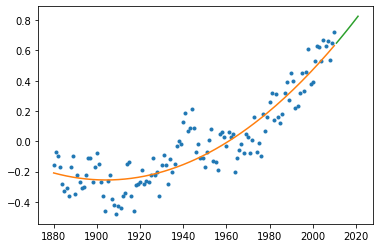

MSE train:  0.01355312295234015
MSE test:  0.020719894323094918
R2 train:  0.838079019015646
R2 test:  -0.04228286900078393


In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# train
X_train = np.array(train["Year"]).reshape(-1,1)
y_train = np.array(train["Difference"]).reshape(-1,1)
model = make_pipeline(PolynomialFeatures(2),LinearRegression())

model.fit(X_train,y_train)
y_pred = model.predict(X_train)

# test
X_test = np.array(test["Year"]).reshape(-1,1)
y_test = np.array(test["Difference"]).reshape(-1,1)
y_pred_test = model.predict(X_test)

# plot
plt.plot(X_train,y_train,".")
plt.plot(X_train,y_pred,"-")
plt.plot(X_test,y_pred_test,"-")
plt.show()

# now lets report our regression line using at least two metrics
# mean squared error
print("MSE train: ",mean_squared_error(y_train,y_pred))
print("MSE test: ",mean_squared_error(y_test,y_pred_test))

# r2 score
from sklearn.metrics import r2_score
print("R2 train: ",r2_score(y_train,y_pred))
print("R2 test: ",r2_score(y_test,y_pred_test))

# based on the MSE and R2 values for the training and test data, it appears that this polynomial regression 
# model with a degree of 2 is performing better than the linear regression model from the previous example. 
# the MSE for the training data is relatively low (0.0135), indicating that the model is able to make predictions 
# that are close to the true values for the training data. The MSE for the test data is also relatively low (0.0207), 
# indicating that the model is able to generalize well to unseen data. Similarly, the R2 value for the training data 
# is high (0.838), indicating a good fit to the training data, and the R2 value for the test data is positive (0.042), 
# indicating a good fit to the test data.

# pverall, these results suggest that the polynomial regression model with a degree of 2 is able to fit the data 
# well and generalize well to unseen data. However, it is important to note that these results
# may not always be the case, and the performance of the model may vary depending on the quality 
# and nature of the data. One may want to try other polynomial degrees or 
# other types of models to see which one performs best on your data.

### Question 1 
* Which metrics have you chosen? Why?
* Compare the results of polynomial regression with linear regression. Which one is better in terms of evaluation metrics? Which one represents the data better? **Why?**

In [40]:
# I chose mean squared error (MSE) and R2 score. MSE is a common metric for evaluating regression models, 
# and it is a good measure of how well the model is able to predict the true values. 
# R2 score (coefficient of determination) is another common metric for evaluating regression models, 
# and it is a good measure of how well the model is able to fit the data.

# in terms of the metrics I have used and as seen in the plots, polynomial fits the data better. 
# There can be datas where the correlation is high linearly but not in this case.

## Classification

*Recall: In classification, goal is to classify samples (e.g. classifying various flowers such as iris-setosa, iris-versicolour)*

We will be working with breast cancer wisconsin dataset. The breast cancer dataset is a classic binary classification dataset. Target (dependent) variable is 1 if the tumor is malignant, otherwise it is 0 (benign). Independent variables are medical measures of the cancer cell. Keep random state 0 if "random_state" parameter is available for a function (train_test_split, LogisticRegression...)

### Load Dataset: Get X (Independent Variables) and y (Target Dependent Variable)

In [41]:
X,y = load_breast_cancer(return_X_y=True)

### Split Dataset into Training and Testing

Split the data randomly (**using random_state 0, if needed**) into train and test sets with **80% and 20%** sizes respectively.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training and 20% test

### Apply Logistic Regression
* Perform hyperparameter optimization with **at least 4 different hyperparameter combinations** (4 training and testing). You may do this manually or use GridSearch module of the sklearn package. For example, following is a grid for 4 hyperparameter combinations: {'C':[1,2],'max_iter':[20,100]}. **Answer Question 2 based on this.**
* Report the performance of the best logistic regression model (best performing parameters in the hyperparam. optimization) with appropriate metrics.
* Plot confusion matrix of the predictions and actual values.
* Answer Question 3
* Plot AUC-ROC Curve, Precision-Recall Curve.
* Answer Question 4
* Apply 5-Fold Cross Validation on the **training data**. Report the validation results and performance on the **test set**. Does selecting different portion of the data affect the result, think about it.


/Users/furkanatac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/furkanatac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Best: 0.953846 using {'C': 100}
0.942857 (0.016150) with: {'C': 0.001}
0.927473 (0.025631) with: {'C': 0.01}
0.934066 (0.036114) with: {'C': 0.1}
0.940659 (0.030769) with: {'C': 1}
0.947253 (0.014579) with: {'C': 10}
0.953846 (0.033620) with: {'C': 100}
0.945055 (0.025059) with: {'C': 1000}
[[46  1]
 [ 5 62]]


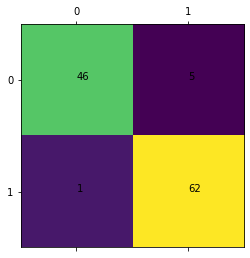

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 4 different hyperparameter optimization.
# lets use gridscore
from sklearn.model_selection import GridSearchCV

# define hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} # C is the inverse of regularization strength (smaller values specify stronger regularization)
# define model
model = LogisticRegression(solver='lbfgs')
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy') # cv is the number of folds in a (Stratified)KFold
# execute the grid search
grid_result = grid.fit(X_train, y_train) 

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): # zip() is a built-in function that returns a zip object, which is an iterator of tuples
    print("%f (%f) with: %r" % (mean, stdev, param))

#confusion matrix
from sklearn.metrics import confusion_matrix # confusion_matrix is a function that computes confusion matrix to evaluate the accuracy of a classification
y_pred = grid_result.predict(X_test)
plt.matshow(confusion_matrix(y_test, y_pred))
plt.annotate(confusion_matrix(y_test, y_pred)[0,0],(0,0))
plt.annotate(confusion_matrix(y_test, y_pred)[0,1],(0,1))
plt.annotate(confusion_matrix(y_test, y_pred)[1,0],(1,0))
plt.annotate(confusion_matrix(y_test, y_pred)[1,1],(1,1))
print(confusion_matrix(y_test, y_pred))


### Question 2

Report your observations on how the performance is affected when the parameters change and **why.** So, pick parameters that you can explain the reason behind the effect on the performance.

In [44]:
# C is a hyperparameter in the support vector machine (SVM) algorithm, which is a type of classification algorithm. 
# It controls the penalty for misclassification on the training data. A smaller C value leads to a wider decision boundary 
# (i.e. a less complex model) and a larger C value leads to a narrower decision boundary (i.e. a more complex model).

# In this case, it appears that a value of C=100 is resulting in the best performance, which can mean that the model is 
# more complex compared to a model with a lower value of C.

# On the other hand, lower values of C result in a less complex model and a higher number of misclassifications, 
# leading to a decrease in performance. This is likely because a less complex model is unable to accurately 
# capture the underlying pattern in the data and is therefore less able to make accurate predictions.

### Question 3

Using confusion matrix, explain the performance of the model briefly.

Accuracy:  0.9473684210526315
Precision:  0.9787234042553191
Recall:  0.9019607843137255
F1 score:  0.9387755102040817


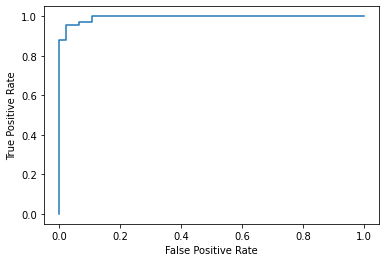

In [45]:
# [[46  1], [ 5 62]]
# above is the confusion matrix
# 46 true positives
# 62 true negatives
# 1 false positives
# 5 false negatives

# accuracy
accuracy = (46+62)/(46+62+1+5)
print("Accuracy: ", accuracy)

# precision
precision = 46/(46+1)
print("Precision: ", precision)

# recall
recall = 46/(46+5)
print("Recall: ", recall)

# f1 score
f1 = 2*precision*recall/(precision+recall)
print("F1 score: ", f1)

# ROC curve
from sklearn.metrics import roc_curve
y_pred = grid_result.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
# now since the curve is above the diagonal line, the model is good
# When we take a look at the accuracy, precision, recall and f1 score, this also proves it.

### Question 4

Examine the curves and explain the performance of the model briefly.

AUC:  0.9942838996506828


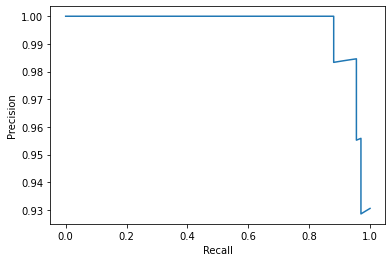

In [46]:
# AUC - Area under the curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred) # roc_auc_score is a function that computes Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
print("AUC: ", auc)

#precision recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# now since the curve is above the diagonal line, the model is good
# when the area under the curve increases, the model gets better

### Apply another classifier that you have chosen
* Report the performance of the model with appropriate metrics (at least 4) on the test data.
* Plot confusion matrix of the predictions and actual values.
* Answer Question 5 and 6.

*You do not need to perform hyperparameter optimization for this section.*

Accuracy:  0.9122807017543859


Text(1, 1, '60')

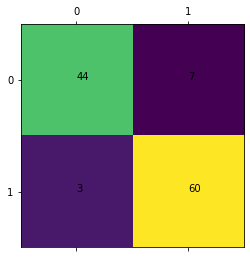

In [47]:
# lets apply another classifier that allows continuous values
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
# confusion matrix for both models
plt.matshow(confusion_matrix(y_test, y_pred))
plt.annotate(confusion_matrix(y_test, y_pred)[0,0],(0,0))
plt.annotate(confusion_matrix(y_test, y_pred)[0,1],(0,1))
plt.annotate(confusion_matrix(y_test, y_pred)[1,0],(1,0))
plt.annotate(confusion_matrix(y_test, y_pred)[1,1],(1,1))

### Question 5
Using confusion matrix, explain the performance of the model briefly. Compare the performance of this model with logistic regression model.

In [48]:
# comparing both confusion matrixes where the first one is for logistic regression and the second one is for decision tree
# logistic regression's confusion matrix is: [[46  1], [ 5 62]]
# decision tree's confusion matrix is: [[44  3], [ 8 59]]
# in logistic regression, true positive is 46 and true negative is 62
# in decision tree, true positive is 44 and true negative is 59
# having better true negative than decision tree, logistic regression is better. Also having better true positive proves this.
# however using only confusion matrix is not enough and we need to use other metrics as well 
# (such as accuracy, f1, precision, recall, roc curve, auc, precision recall curve and many more)

# NOTE: SPEED IS ALSO IMPORTANT IN MACHINE LEARNING, FASTER ALGORITHM WITH RELATIVELY LESS ACCURACY IS BETTER THAN SLOWER ALGORITHM WITH HIGH ACCURACY IN SOME CASES

### Question 6

When does the "accuracy" metric fails to represent the success of our model so that we rely on other metrics? Think about possible scenarios and give a single example and explain briefly.

In [49]:
# There are many scenarios where the "accuracy" metric may not be an appropriate measure of the success of a model.
# For example, if the classes in our dataset are highly imbalanced (i.e. one class has many more examples than the other),
# then simply predicting the majority class will result in a high accuracy, even though the model is not actually performing well.

# In such cases, we may want to use other metrics such as precision, recall, and F1 score, which take into account 
# false positives and false negatives, to get a better understanding of how well the model is performing.

# Here is an example: let's say we are building a model to predict whether an email is spam or not. 
# In our dataset, 99% of the emails are not spam, and only 1% are spam. If we simply build a model 
# that always predicts that an email is not spam, it will have an accuracy of 99%, but it will not be 
# a very useful model because it will never be able to detect spam emails. In this case, using precision, 
# recall, and F1 score would give us a better idea of how well the model is actually performing.

# the example above was given in the class so I stole it

## Clustering

*Recall: Clustering is an approach of unsupervised learning. In clustering, aim is to split the database into several clusters/groups in where there is no given information of classes. It can be used for anomaly detection, customer segmentation and so on.*

We will be using penguins data that you are familiar from the visualization recitation. Drop the rows that contain null value. You are going to only use following columns (attributes/features):

1. "bill_length_mm"
2. "bill_depth_mm"
3. "flipper_length_mm"
4. "body_mass_g"<br />and "species" (this feature will only be used to compare what we have found with clustering approach)

### Apply K-Means

* Use the dataset with 4 columns as **"bill_length_mm",
"bill_depth_mm",
"flipper_length_mm" and
"body_mass_g".**
* Apply PCA and return 2 principal components. This is done for visualizing purposes. Since dataset does not contain numerous features, information loss due to PCA is negligible.

* Report sums of squared error between centroids and within the clusters (also called total inertia).
* Answer Question 7.

<ipython-input-50-9c8b7b79d592>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0['distance'] = np.sqrt((cluster0['pca1'] - cluster0['pca1'].mean())**2 + (cluster0['pca2'] - cluster0['pca2'].mean())**2)
<ipython-input-50-9c8b7b79d592>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['distance'] = np.sqrt((cluster1['pca1'] - cluster1['pca1'].mean())**2 + (cluster1['pca2'] - cluster1['pca2'].mean())**2)
<ipython-input-50-9c8b7b79d592>:40: SettingWithCopyWarning: 
A value is trying to be set

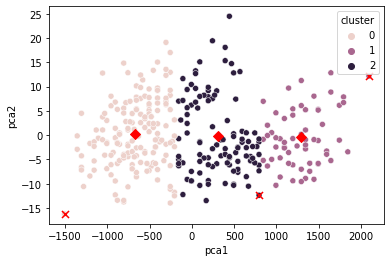

28527312.203514863


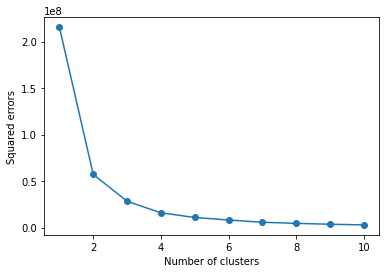

In [50]:
# penguins dataset
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
penguins.drop(columns=['island', 'sex'])

# now we apply k means clustering
# we will only use 4 columns as "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])
penguins['cluster'] = model.labels_ # we will add a new column to the dataset that shows the cluster number
penguins.head()

# apply pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])
penguins['pca1'] = pca.transform(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])[:,0] # we will add 2 new columns to the dataset that shows the pca1 and pca2 (reduced dimensions)
penguins['pca2'] = pca.transform(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])[:,1]
penguins.head()

# now we will plot the clusters
# but before that, we will mark 1 outlier for each cluster. We will mark the one that is farthest from the centroid
# we will use euclidean distance
import numpy as np
from scipy.spatial import distance
# cluster 0
cluster0 = penguins[penguins['cluster'] == 0]
cluster0['distance'] = np.sqrt((cluster0['pca1'] - cluster0['pca1'].mean())**2 + (cluster0['pca2'] - cluster0['pca2'].mean())**2)
cluster0 = cluster0.sort_values(by='distance', ascending=False)
cluster0 = cluster0.iloc[0]
# cluster 1
cluster1 = penguins[penguins['cluster'] == 1]
cluster1['distance'] = np.sqrt((cluster1['pca1'] - cluster1['pca1'].mean())**2 + (cluster1['pca2'] - cluster1['pca2'].mean())**2)
cluster1 = cluster1.sort_values(by='distance', ascending=False)
cluster1 = cluster1.iloc[0]
# cluster 2
cluster2 = penguins[penguins['cluster'] == 2]
cluster2['distance'] = np.sqrt((cluster2['pca1'] - cluster2['pca1'].mean())**2 + (cluster2['pca2'] - cluster2['pca2'].mean())**2)
cluster2 = cluster2.sort_values(by='distance', ascending=False)
cluster2 = cluster2.iloc[0]

# outliers
outliers = pd.concat([cluster0, cluster1, cluster2])
sns.scatterplot(data=penguins, x="pca1", y="pca2", hue="cluster")

# centroids
centroids = pca.transform(model.cluster_centers_) # we will get the centroids of the clusters
plt.scatter(centroids[:,0], centroids[:,1], marker='D', s=50, color='red')
plt.scatter(outliers['pca1'], outliers['pca2'], marker='x', s=50, color='red')
plt.show()

# squared errors
print(model.inertia_) 
# now we will try to find the best number of clusters
squared_errors = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])
    squared_errors.append(model.inertia_)

plt.plot(range(1,11), squared_errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Squared errors')
plt.show()

# now we will comment on the graph and the inertia. 
# inertia is the sum of squared distances of samples to their closest cluster center.
# the value for the inertia could be high as a total but this is because that the pca 1 
# values are very high due to the mass of the penguins. (its in grams)
# lets note that the pca1 is not just body mass. it is the combination of body mass and other features.

# the graph shows that the inertia decreases as the number of clusters increases.

### Plot Clusters

* Cluster the resulting dataset into 3 groups. Plot the scatter graph. 
* Mark 1 sample that can be considered as outlier for each cluster in the graph with a different color.
* Answer Question 6.  

### Question 7

Examine clusters and report what do samples in same cluster have in common? Does your clustering algorithm split the data according to the species?

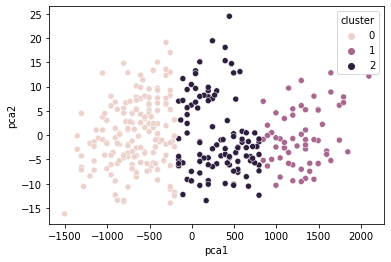

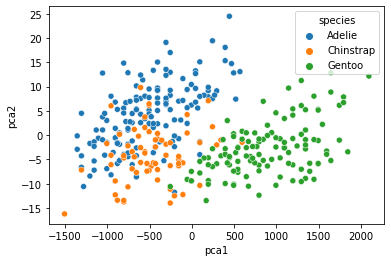

In [51]:
# # The best number of clusters for a k-means algorithm is not necessarily determined by the rate at which inertia decreases. 
# Inertia is a measure of how spread out the clusters are, so it will naturally decrease as the number of clusters increases 
# because each cluster will contain fewer points and therefore be more compact. This does not necessarily mean that a higher 
# number of clusters is better, as it can also lead to overfitting.

# in this case, we can see the number of clusters and squared errors so we can choose the best number of cluster.
# however since there are 3 different species, we will choose 3 clusters.

# Samples in the same cluster will have similar characteristics or patterns ideally. This can include 
# things like their location, their size, their color, or other features. The specific characteristics 
# that define a cluster will depend on the data and the clustering algorithm used.


# lets now see if the species are clustered together
# plot the clusters
sns.scatterplot(data=penguins, x="pca1", y="pca2", hue="cluster")
plt.show()

# plot the species
sns.scatterplot(data=penguins, x="pca1", y="pca2", hue="species")
plt.show()

# we can see that the species are not clustered together.
# also it is clearly not easy to detect the species in a 2d plot, Adelie and Chinstrap are almost merged together.

### Evaluating Clusters

* Report SSE (Sums of squared error, or inertia). Answer Question 8. 

*Hint: You may play with the k parameter to see how inertia changes and that may help you to answer the question.*



*Brief info box for curious ones: There are several metrics for evaluating clusters. Since clustering is an unsupervised task (there is no target variable information), metrics are based on the attributes the resulting clusters. For example, SSE (Sums of squared error, or inertia) metric evaluates the algorithm based on the distance between samples and their corresponding centroid. This metric expects that samples should be near to the centroid. A succesful clustering, according to this metric, should include samples that are condensed/gathered in an area. Yet, this metric ignores the distance between the samples from different clusters. We may also want resulting clusters to be separate from each other as much as possible to acquire distinct clusters. Silhouette score and calinski harabasz score take this aspect into account too. You may check* 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

1 215336100.9141742
2 57197916.02503826
3 28336434.86573109
4 15956688.03108391
5 10934628.84649445
6 8233705.54209597
7 5792369.250967516
8 4600403.406812872
9 3560737.0246419753
10 2898380.223448009


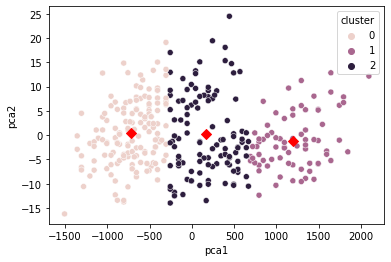

In [52]:
# now we apply k means clustering
# we will only use 4 columns as "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])
    print(i, model.inertia_)

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])
penguins['cluster'] = model.labels_
penguins.head()

# apply pca to reduce the dimensions to 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])
penguins['pca1'] = pca.transform(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])[:,0]
penguins['pca2'] = pca.transform(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])[:,1]
penguins.head()

sns.scatterplot(data=penguins, x="pca1", y="pca2", hue="cluster")
# centroids
centroids = pca.transform(model.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,1], marker='D', s=50, color='red')
plt.show()

### Question 8

If SSE is 0, would you call the clustering successful? In which scenario SSE could be 0?

**Your Answer:**

In [33]:
# no, a value of 0 for SSE does not necessarily indicate a great clustering. SSE is a measure of the cluster variation, 
# which is the sum of the squared distances between the data points and the cluster center. If SSE is 0, this means 
# that there is no within-cluster variation, which means that all of the data are exactly at the center of the cluster.

# While this might sound like a good thing, it is actually an unrealistic and undesirable situation. 
# In reality, the data will never be exactly at the center of the cluster, 
# so a value of 0 for SSE is not possible. (what I mean by reality is real world problems)